# 2.2 Smoothing

Images can exhibit different levels of noise, that is, a random variation of brightness or color information. It is mainly produced by the sensor response (more in CMOS technology), analog-to-digital conversion, and bit errors in transmission. 

There are two typical types of noises:

- **Salt & pepper** noise (black and white pixels in random locations of the image) or **impulse** noise (only white pixels)

- **Gaussian** noise (intensities are affected by an additive zero-mean Gaussian error.)

<img src="./images/noise.png" width="800"> 

In this section, we are going to learn about some smoothing techniques aiming to eliminate or reduce such noise, including:

- Convolution-based methods
  - Neighborhood averaging
  - Gaussian filter
- Median filter
- Image average

## Problem context - Number-plate recognition

<img src="./images/access_system.png" width="400">

Returning to parking access problem at UMA, they were grateful with your previous work. After some testing, there were some complaints about binarization because is not working as well as they expected, it is suspected that difficulties are caused by image noise. The camera that is being used in the system is having some problems, different type of noise are appearing in captured images. Images `noisy_1.jpg` and `noisy_2.jpg` are examples of those problems.

You are asked again to provide them some help with this problem.

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib
from ipywidgets import interactive, fixed, widgets
matplotlib.rcParams['figure.figsize'] = (15.0, 15.0)
import random

images_path = './images/'

### **<span style="color:green"><b><i>ASSIGNMENT 1: Taking a look at images</i></b></span>**

First, try to **display both images** and see what is the problem.


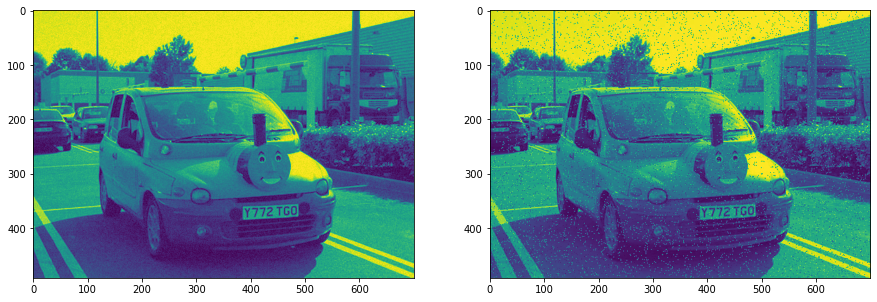

In [2]:
# ASSIGNMENT 1
# Read 'noisy_1.jpg' and 'noisy_2.jpg' images and display them in a 1x2 plot
# Write your code here!

# Read images
img_a = plt.imread(images_path+'noisy_1.jpg')
img_b = plt.imread(images_path+'noisy_2.jpg')

# Display first one
plt.subplot(1,2,1)
plt.imshow(img_a)

# Display second one
plt.subplot(1,2,2)
plt.imshow(img_b)


### <font color="blue"><b><i>Thinking about it (1)</i></b></font>

Once you displayed both images, **answer the following questions:**

- What is the difference between them?

    <p style="margin: 4px 0px 6px 5px; color:blue"><i>The second one has salt and pepper noise while the first one looks like it has some Gaussian Noise</i></p>

- Why can this happen?

    <p style="margin: 4px 0px 6px 5px; color:blue"><i> Due to the CMOS camera?</i></p>

## 2.2.1 Convolution-based methods

There are some interesting smoothing techniques based on the convolution mathematical operation that can help you to alleviate the noise problem. Two examples are **neighborhood averaging** and **Gaussian filter**.

### a) Neighborhood averaging

Convolving an image with a *small* kernel is similar to apply a function over all the image. For example, by using convolution it is possible to apply the first smoothing operator that you are going to try, **neighborhood averaging**. This operator averages the intensity values of pixels surrounding a given one, efficiently removing noise. Formally:

$S(i,j) = \frac{1}{p} \sum_{(m,n)\in s} I(m,n)$

with $s$ being the set of $p$ pixels in the neighborhood ($m x n$) of $(i,j)$. Convolution permits us to implement it using a kernel, resulting in a linear operation! For example, for a 3x3 neighborhood:

<table>
	<tbody>
		<tr>
			<td style="border: 1px solid;">1/9</td>
			<td style="border: 1px solid;">1/9</td>
			<td style="border: 1px solid;">1/9</td>
		</tr>
		<tr>
			<td style="border: 1px solid;">1/9</td>
			<td style="border: 1px solid;" bgcolor="#81F7F3">1/9</td>
			<td style="border: 1px solid;">1/9</td>
		</tr>
		<tr>
			<td style="border: 1px solid;">1/9</td>
			<td style="border: 1px solid;">1/9</td>
			<td style="border: 1px solid;">1/9</td>
		</tr>
	</tbody>
</table>

You can think that the kernel is like a weight matrix for neighbor pixels, and convolution like a double `for` loop that applies the kernel pixel by pixel over the image. 

The **main drawback** of this technique is the blurring of the edges appearing in the image. 

### **<span style="color:green"><b><i>ASSIGNMENT 2: Applying average filtering</i></b></span>**

Complete the method **average_filter** that convolves an input image using a kernel which values depend on its size (e.g. for a size 3x3 size its values are 1/9, for a 5x5 size 1/25 and so on). Then display the differences between the original image and the resultant one if `verbose` is True. It takes the image and kernel aperture size as input and returns the smoothed image.

*Tip: OpenCV defines the 2D-convolution [cv2.filter2D()](https://docs.opencv.org/master/d4/d86/group__imgproc__filter.html#ga27c049795ce870216ddfb366086b5a04) method, where:*
- *the `ddepth` parameter means desired depth of the destination image.*
- *Input images use to be 8-bit unsigned integer (`ddepth`=cv2.CV_8U).*
- *However, output sometimes is required to be 16-bit signed (`ddepth`=cv2.CV_16S)*

In [3]:
# ASSIGNMENT 2
# Implement a function that applies an 'average filter' to an input image. The kernel size of the filter is also an input. 
# Show the input image and the resulting one in a 1x2 plot.
def average_filter(image, w_kernel, verbose=False):
    """ Applies neighborhood averaging to an image and display it.   
    
        Args:
            image: Input image
            w_kernel: Kernel aperture size
            verbose: Only show images if this is True
            
        Returns:
            smoothed_img: smoothed image 
    """

    # Create the kernel
    kernel = np.ones((w_kernel, w_kernel))*(1/w_kernel**2)
    
    # Convolve image and kernel
    output = cv2.filter2D(image, cv2.CV_8U, kernel)
    
    
    if verbose:
        # Show the initial image
        # Display first one
        plt.subplot(1,2,1)
        plt.imshow(image)        

        # Show the resultant one
        plt.subplot(1,2,2)
        plt.imshow(output)
    
    return output
        

You can use the next snippet of code to **test if your results are correct**:

<font color='blue'>**Expected output:**  </font>

    [[ 9 12  9 12]  
    [  8 10  8 10]  
    [  7 10  8 11]  
    [  5  7  6  8]]

In [4]:
# Try this code
image = np.array([[1,6,2,5],[22,6,22,7],[7,7,13,0],[0,2,8,4]], dtype=np.uint8)
w_kernel = 3
print(average_filter(image, w_kernel))

[[ 9 12  9 12]
 [ 8 10  8 10]
 [ 7 10  8 11]
 [ 5  7  6  8]]


### <font color="blue"><b><i>Thinking about it (2)</i></b></font>

**You are asked to** try **average_filter** using both noisy images `noisy_1.jpg` and `noisy_2.jpg`. Then, **answer following questions**:

- Is noise removed in first image?

    <p style="margin: 4px 0px 6px 5px; color:blue"><i>Your answer here!</i></p>

- Is noise removed in second image?

    <p style="margin: 4px 0px 6px 5px; color:blue"><i> No!</i></p>

- What is a good value for `w_kernel`?

    <p style="margin: 4px 0px 6px 5px; color:blue"><i>Your answer here!</i></p>

In [5]:
# Interact with the kernel size
noisy_img = cv2.imread(images_path + 'noisy_2.jpg', 0)
interactive(average_filter, image=fixed(noisy_img), w_kernel=(0,5,1), verbose=fixed(True))

interactive(children=(IntSlider(value=2, description='w_kernel', max=5), Output()), _dom_classes=('widget-inte…

### b) Gaussian filtering 

An alternative to neighborhood averaging is **Gaussian filtering**. This technique applies the same concept than averaging (a convolution operation) but with a more complex kernel.

The idea is to take advantage of the normal distribution for creating a kernel that keeps borders while smoothing. This is done by giving more relevance to the pixels that are closer to the kernel center, creating a **neighborhood weighted averaging**. For example, considering a kernel with an aperture of 2 ($5\times5$ size), its values would be:

<table>
	<tbody>
		<tr>
			<td style="border: 1px solid;">0.003</td>
			<td style="border: 1px solid;">0.013</td>
			<td style="border: 1px solid;">0.022</td>
            <td style="border: 1px solid;">0.013</td>
            <td style="border: 1px solid;">0.003</td>
		</tr>
        <tr>
			<td style="border: 1px solid;">0.013</td>
			<td style="border: 1px solid;">0.059</td>
			<td style="border: 1px solid;">0.097</td>
            <td style="border: 1px solid;">0.059</td>
            <td style="border: 1px solid;">0.013</td>
		</tr>
		<tr>
            <td style="border: 1px solid;">0.022</td>
			<td style="border: 1px solid;">0.097</td>
			<td style="border: 1px solid;" bgcolor="#81F7F3">0.159</td>
			<td style="border: 1px solid;">0.097</td>
            <td style="border: 1px solid;">0.022</td>
		</tr>
		<tr>
			<td style="border: 1px solid;">0.013</td>
			<td style="border: 1px solid;">0.059</td>
			<td style="border: 1px solid;">0.097</td>
            <td style="border: 1px solid;">0.059</td>
            <td style="border: 1px solid;">0.013</td>
		</tr>
		<tr>
			<td style="border: 1px solid;">0.003</td>
			<td style="border: 1px solid;">0.013</td>
			<td style="border: 1px solid;">0.022</td>
            <td style="border: 1px solid;">0.013</td>
            <td style="border: 1px solid;">0.003</td>
		</tr>        
	</tbody>
</table>


For defining such a kernel it is used the Gaussian bell:

In 1-D:
$$g_{\sigma}(x) = \frac{1}{\sigma\sqrt{2\pi}}exp\left(-\frac{x^2}{2\sigma^2}\right)$$

In 2-D, we can make use of the *separability property* to separate rows and columns, resulting in convolutions of two 1D kernels:
$$g_{\sigma}(x,y) = \underbrace{\frac{1}{2\pi\sigma^2}exp\left(-\frac{x^2+y^2}{2\sigma^2}\right)}_{g}
= \underbrace{\frac{1}{\sigma\sqrt{2\pi}}exp\left(-\frac{x^2}{2\sigma^2}\right)}_{g_x}*
\underbrace{\frac{1}{\sigma\sqrt{2\pi}}exp\left(-\frac{y^2}{2\sigma^2}\right)}_{g_y}
$$

For example: 

<div style="margin: 0 auto; text-align: center; display: table;">

<div style = "padding: 10px; display: table-cell; vertical-align: middle;">$g=g_y\otimes g_x\rightarrow$ </div>
    
<table style = "display: table-cell; vertical-align: middle;">
	<tbody>
		<tr>
			<td style="border: 1px solid;">1</td>
			<td style="border: 1px solid;">2</td>
			<td style="border: 1px solid;">1</td>
		</tr>
		<tr>
			<td style="border: 1px solid;">2</td>
			<td style="border: 1px solid;" bgcolor="#81F7F3">4</td>
			<td style="border: 1px solid;">2</td>
		</tr>
		<tr>
			<td style="border: 1px solid;">1</td>
			<td style="border: 1px solid;">2</td>
			<td style="border: 1px solid;">1</td>
		</tr>
	</tbody>
</table> 
    
<div style = "padding: 10px; display: table-cell; vertical-align: middle;"> $=$ </div>
    
<table style = "display: table-cell; vertical-align: middle;">
	<tbody>
		<tr>
			<td style="border: 1px solid;">1</td>
		</tr>
		<tr>
			<td style="border: 1px solid;" bgcolor="#81F7F3">2</td>
		</tr>
		<tr>
			<td style="border: 1px solid;">1</td>
		</tr>
	</tbody>
</table>
    
<div style = "padding: 10px; display: table-cell; vertical-align: middle;"> $\otimes$ </div>
    
<table style = "display: table-cell; vertical-align: middle;">
	<tbody>
		<tr>
			<td style="border: 1px solid;">1</td>
			<td style="border: 1px solid;" bgcolor="#81F7F3">2</td>
			<td style="border: 1px solid;">1</td>
		</tr>
	</tbody>
</table>
</div>

And because of the *associative property*:

$$\underbrace{f \otimes g}_{\text{2D convolution}} =
f \otimes (g_x \otimes g_y) = \underbrace{(f \otimes g_x) \otimes g_y}_{\text{Two 1D convolutions}}$$

The degree of smoothing of this filter can be controlled by the $\sigma$ parameter, that is, the **standard deviation** of the Gaussian distribution used to build the kernel. The bigger the $\sigma$, the more smoothing, but it could result in a blurrier image!

The $\sigma$ parameter also influences the **kernel aperture** value to use, since it must be proportional. It has to be big enough to account for non-negligible values in the kernel! For example, in the kernel below, it doesn't make sense to increase its aperture (currently $1$) since new rows/columns would have very small values:

<table>
	<tbody>
		<tr>
			<td style="border: 1px solid;">1</td>
			<td style="border: 1px solid;">15</td>
			<td style="border: 1px solid;">1</td>
		</tr>
		<tr>
			<td style="border: 1px solid;">15</td>
			<td style="border: 1px solid;" bgcolor="#81F7F3">100</td>
			<td style="border: 1px solid;">15</td>
		</tr>
		<tr>
			<td style="border: 1px solid;">1</td>
			<td style="border: 1px solid;">15</td>
			<td style="border: 1px solid;">1</td>
		</tr>
	</tbody>
</table> 

### **<span style="color:green"><b><i>ASSIGNMENT 3: Implementing the famous gaussian filter</i></b></span>**

Complete the `gaussian_filter()` method in a similar way to the previous one, but including a new input: `sigma`, representing the standard deviation of the Gaussian distribution used for building the kernel. 

*Tip: Note that NumPy defines mathematical functions that operate over arrays like [exponential](https://docs.scipy.org/doc/numpy/reference/generated/numpy.exp.html) or [square-root](https://docs.scipy.org/doc/numpy/reference/generated/numpy.sqrt.html), as well as mathematical [constants](https://docs.scipy.org/doc/numpy/reference/constants.html) like `np.pi`. Remember the associative property of convolution*.

In [6]:
# ASSIGNMENT 3
# Implement a function that:
# -- creates a 2D Gaussian filter (tip: it can be done by implementing a 1D Gaussian filter and doing the outer product of the 1D kernel with itself)
# -- convolves the input image with the kernel
# -- displays the input image and the filtered one in a 1x2 plot (if verbose=True)
# -- returns the smoothed image
def gaussian_filter(image, w_kernel, sigma, verbose=False):
    """ Applies Gaussian filter to an image and display it.   

        Args:
            image: Input image
            w_kernel: Kernel aperture size
            sigma: standard deviation of Gaussian distribution
            verbose: Only show images if this is True
        
        Returns:
            smoothed_img: smoothed image 
    """
    const = 1/(np.sqrt(2*np.pi)*sigma)
    
    # Create kernel using associative property
    x = np.arange(-w_kernel//2, (w_kernel//2)+1)
    kernel_1d = const*np.exp(-x**2/(2*sigma**2))
    # print(kernel_1d)
    kernel = np.outer(kernel_1d, kernel_1d)
    # print(kernel.shape)
    
    # Convolve image and kernel
    output = cv2.filter2D(image, -1, kernel)
    if verbose:
        # Show the initial image
        # Display first one
        plt.subplot(1,2,1)
        plt.imshow(image)        

        # Show the resultant one
        plt.subplot(1,2,2)
        plt.imshow(output)
#     output = cv2.GaussianBlur(image,(w_kernel, w_kernel), sigma)
    
    return output
        

Again, you can use next code to **test if your results are correct**:

In [8]:
image = np.array([[1,6,2,5],[10,6,22,7],[7,7,13,0],[0,2,8,4]], dtype=np.uint8)
w_kernel = 3
sigma = 1.2
print(gaussian_filter(image, w_kernel,sigma))

[[5 6 7 8]
 [6 7 7 8]
 [5 6 6 7]
 [4 5 5 6]]


### <font color='blue'>**Expected output:**  </font>

    [[5 6 7 8]
     [5 7 7 8]
     [4 6 7 7]
     [3 5 5 5]]

### <font color="blue"><b><i>Thinking about it (3)</i></b></font>

**You are asked to** try **gaussian_filter** using both noisy images `noisy_1.jpg` and `noisy_2.jpg`. Then, **answer following questions**:

- Is noise removed in first image?

    <p style="margin: 4px 0px 6px 5px; color:blue"><i>Your answer here!</i></p>

- Is noise removed in second image?

    <p style="margin: 4px 0px 6px 5px; color:blue"><i>No, the salt pepper doesnt seem to get averaged out</i></p>

- What is a good value for `w_kernel` and `sigma`?

    <p style="margin: 4px 0px 6px 5px; color:blue"><i>Your answer here!</i></p>

In [7]:
# Interact with the kernel size and the sigma value
noisy_img = cv2.imread(images_path + 'noisy_1.jpg', 0)
interactive(gaussian_filter, image=fixed(noisy_img), w_kernel=(0,5,1), sigma=(1,3,0.3), verbose=fixed(True))

interactive(children=(IntSlider(value=2, description='w_kernel', max=5), FloatSlider(value=1.9, description='s…

## 2.2.2 Median filter

There are other smoothing techniques besides convolution. One of them is **median filtering**, which operates by replacing each pixel in the image with the median of its neighborhood. For example, considering a $3\times3$ neighborhood: 

<img src="./images/median.png" width="600">

Median filtering is quite good preserving borders (no image blurring), and is very effective to remove salt&pepper noise. 

An **important drawback** of this technique is that it is not a linear operation, so it exhibits a high computational cost. Nevertheless there are efficient implementations like pseudomedian, sliding median, etc. 

### **<span style="color:green"><b><i>ASSIGNMENT 4: Playing with the median filter</i></b></span>**

We want to try this filter to see if it could be useful for our system. For that, complete the `median_filter()` method in a similar way to the previous techniques. This method takes as inputs the initial image and the window aperture size (`w_window`), that is, the size of the neighborhood.

*Tip: OpenCV already implements median filtering*

In [9]:
# ASSIGNMENT 4
# Implement a function that:
# -- applies a median filter to the input image
# -- displays the input image and the filtered one in a 1x2 plot if verbose = True
# -- returns the smoothed image
def median_filter(image, w_window, verbose=False):
    """ Applies median filter to an image and display it.   

        Args:
            image: Input image
            w_window: window aperture size
            verbose: Only show images if this is True
        
        Returns:
            smoothed_img: smoothed image 
    """
    
    #Apply median filter
    out = cv2.medianBlur(image, w_window)
    
    if verbose:
        # Show the initial image
        plt.subplot(1,2,1)
        plt.imshow(image)
        

        # Show the resultant one
        plt.subplot(1,2,2)
        plt.imshow(out)
    return out

You can use the next code to **test if your results are correct**:

In [10]:
image = np.array([[1,6,2,5],[10,6,22,7],[7,7,13,0],[0,2,8,4]], dtype=np.uint8)
w_window = 5
print(median_filter(image, w_window))

[[6 5 5 5]
 [6 5 5 5]
 [6 5 5 5]
 [6 4 4 4]]


<font color='blue'>**Expected output:**  </font>

    [[6 5 5 5]
     [6 5 5 5]
     [6 5 5 5]
     [6 4 4 4]]

### <font color="blue"><b><i>Thinking about it (4)</i></b></font>

**You are asked to** try **median_filter** using both noisy images `noisy_1.jpg` and `noisy_2.jpg`. Then, **answer following questions**:

- Is noise removed in first image?

    <p style="margin: 4px 0px 6px 5px; color:blue"><i>Yes!</i></p>

- Is noise removed in second image?

    <p style="margin: 4px 0px 6px 5px; color:blue"><i>Yes!</i></p>

- What is a good value for `w_window`?

    <p style="margin: 4px 0px 6px 5px; color:blue"><i>3</i></p>

In [11]:
# Interact with the window size
noisy_img = cv2.imread(images_path + 'noisy_2.jpg', 0)
interactive(median_filter, image=fixed(noisy_img), w_window=(1,5,1), verbose=fixed(True))

interactive(children=(IntSlider(value=3, description='w_window', max=5, min=1), Output()), _dom_classes=('widg…

## 2.2.3 Image average

Next, we asked UMA for the possibility to change their camera from a single shot mode to a multi-shot sequence of images, this is called burst mode. They were very kind and provided us the sequences `burst1_(0:9).jpg` and `burst2_(0:9).jpg` for testing.

Image sequences allow **image averaging**, the last technique we want to try, where the content of each pixel in the final image is the result of averaging the value of that pixel in the whole sequence. Remark that, in the context of our application, this technique will work only if the car is fully stopped!  

The idea behind image averaging is that using a high number of noisy images from a still camera in a static scene, the resultant image would be noise-free. This is supposed because noise usually has zero mean. Mathematically:

<img src="./images/average_1.png" width="700">

This method is very effective with gaussian noise but not with salt&pepper, and it also preserves edges. On the contrary, as mentioned, it is only applicable for sequences of images from a still scene. 

### **<span style="color:green"><b><i>ASSIGNMENT 5: And last but not least, image averaging</i></b></span>**

We want to analyze the suitability of this method for our application, so you have to complete the `image_averaging()` method. It takes the fully image sequence ([sequence length $\times$ height $\times$ width] array) and the number of images that are going to be used.

*Tip: [average of an array along specified axis](https://docs.scipy.org/doc/numpy-1.9.2/reference/generated/numpy.average.html)*

In [12]:
# ASSIGNMENT 5
# Implement a function that:
# -- takes a number of images of the sequence (burst_length)
# -- averages the vale of each pixel in the selected part of the sequence
# -- displays the first image in the sequence and the final, filtered one in a 1x2 plot if verbose = True
# -- returns the average image
def image_averaging(burst, burst_length, verbose=False):
    """ Applies image averaging to a sequence of images and display it.   

        Args:
            burst: 3D array containing the fully image sequence.
            burst_length: Natural number indicating how many images are 
                          going to be used. 
            verbose: Only show images if this is True
                
        Returns:
            average_img: smoothed image 
    """
    
    
    #Take only `burst_length` images
    image = burst[:burst_length,:,:]    
    
    # Apply image averaging
    mean_img = np.mean(image, axis=0)
    
    
    # Change data type to 8-bit unsigned
    mean_img = mean_img.astype("uint8")
    print(mean_img.shape)
    
    
    if verbose:
        # Show the initial image
        plt.subplot(1,2,1)
        plt.imshow(image[0])

        # Show the resultant one
        plt.subplot(1,2,2)
        plt.imshow(mean_img)
    return mean_img

You can use the next code to **test if your results are correct**:

In [13]:
burst = np.array([[[1,6,2,5],[10,6,22,7],[7,7,13,0],[0,2,8,4]],
                  [[7,7,13,0],[0,2,8,4],[1,6,2,5],[10,6,22,7]],
                  [[7,7,13,0],[0,2,8,4],[1,6,2,5],[10,6,22,7]]],dtype=np.uint8)
print(burst.shape)

print(image_averaging(burst, 2))

(3, 4, 4)
(4, 4)
[[ 4  6  7  2]
 [ 5  4 15  5]
 [ 4  6  7  2]
 [ 5  4 15  5]]


<font color='blue'>**Expected output:**  </font>

    [[ 4  6  7  2]
     [ 5  4 15  5]
     [ 4  6  7  2]
     [ 5  4 15  5]]

### <font color="blue"><b><i>Thinking about it (5)</i></b></font>

**You are asked to** try **image_averaging** with `burst1_XX.jpg` and `burst2_XX.jpg` sequences. Then, **answer these questions**:

- Is the noise removed in both sequences?

    <p style="margin: 4px 0px 6px 5px; color:blue"><i>Yes!</i></p>

- What number of photos should the camera take in each image sequence?

    <p style="margin: 4px 0px 6px 5px; color:blue"><i>For the second case >3</i></p>

In [14]:
# Interact with the burst length
# Read image secuence
burst = []
for i in range(10):
    burst.append(cv2.imread('./images/burst2_' + str(i) + '.jpg', 0))
    
# Cast to array
burst = np.asarray(burst)

interactive(image_averaging, burst=fixed(burst), burst_length=(1, 10, 1), verbose=fixed(True))

interactive(children=(IntSlider(value=5, description='burst_length', max=10, min=1), Output()), _dom_classes=(…

### <font color="blue"><b><i>Thinking about it (6)</i></b></font>

Finally, you can check the methods you implemented on both noisy images executing the following code. 

- **What method would you choose** for a final implementation in the system? **Why?*

    <p style="margin: 4px 0px 6px 5px; color:blue"><i> Image averaging. It works well for all types of noises</i></p>

(50, 180)
(50, 180)


Text(0.5, 1.0, 'Image averaging')

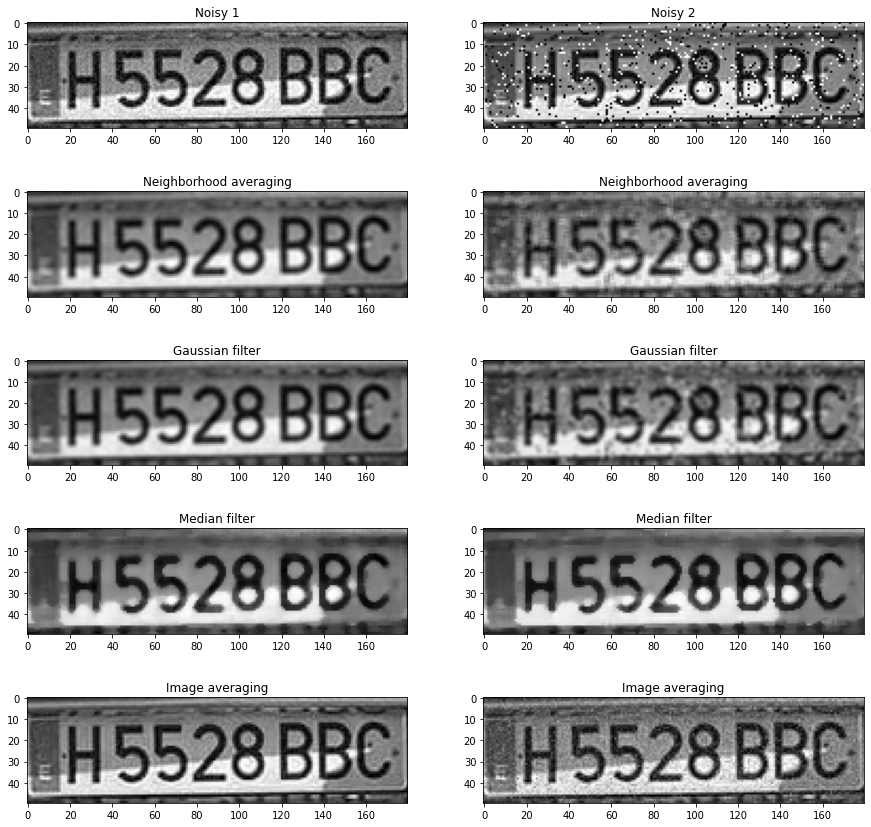

In [15]:
#Read first noisy image
im1 = cv2.imread('./images/burst1_0.jpg', 0)
im1 = im1[290:340,280:460]

# Read second noisy image
im2 = cv2.imread('./images/burst2_0.jpg', 0)
im2 = im2[290:340,280:460]

# Apply neighborhood averaging
neighbor1 = average_filter(im1, 3)
neighbor2 = average_filter(im2, 3)

# Apply Gaussian filter
gaussian1 = gaussian_filter(im1, 3,1)
gaussian2 = gaussian_filter(im2, 3,1)

# Apply median filter
median1 = median_filter(im1, 5)
median2 = median_filter(im2, 5)

# Apply image averaging
burst1 = []
burst2 = []
for i in range(10):
    burst1.append(cv2.imread('./images/burst1_' + str(i) + '.jpg', 0))
    burst2.append(cv2.imread('./images/burst2_' + str(i) + '.jpg', 0))
    
burst1 = np.asarray(burst1)
burst2 = np.asarray(burst2)

burst1 = burst1[:,290:340,280:460]
burst2 = burst2[:,290:340,280:460]

average1 = image_averaging(burst1, 10)
average2 = image_averaging(burst2, 10)

# Plot results
plt.subplot(521)
plt.imshow(im1, cmap='gray')
plt.title('Noisy 1')

plt.subplot(522)
plt.imshow(im2, cmap='gray')
plt.title('Noisy 2')

plt.subplot(523)
plt.imshow(neighbor1, cmap='gray')
plt.title('Neighborhood averaging')

plt.subplot(524)
plt.imshow(neighbor2, cmap='gray')
plt.title('Neighborhood averaging')

plt.subplot(525)
plt.imshow(gaussian1, cmap='gray')
plt.title('Gaussian filter')

plt.subplot(526)
plt.imshow(gaussian2, cmap='gray')
plt.title('Gaussian filter')

plt.subplot(527)
plt.imshow(median1, cmap='gray')
plt.title('Median filter')

plt.subplot(528)
plt.imshow(median2, cmap='gray')
plt.title('Median filter')

plt.subplot(529)
plt.imshow(average1, cmap='gray')
plt.title('Image averaging')

plt.subplot(5,2,10)
plt.imshow(average2, cmap='gray')
plt.title('Image averaging')

## Conclusion

That was a complete and awesome job! Congratulations, you learned 

- how to reduce noise in images, for both salt & pepper and Gaussian noise.
- which methods are useful for each type of noise and which not.
- apply convolution and efficient implementations of some kernels.

If you want to improve your knowledge about noise in digital images, you can surf the internet for *speckle noise* and *Poisson noise*. 

## Extra

- **Define speckle noise and comment where (in real life) can appear.**

- **Define Possion noise and comment where (in real life) can appear.**